In [4]:
#start of Gaussian Naive Bayes Model considering medical data
#link to download: https://www.kaggle.com/johnsmith88/heart-disease-dataset

#importing necessary libraries and load the data from dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#spliting the data into two parts train and test
y=data['target']
X=data.drop('target',axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(820, 13) (205, 13) (820,) (205,)


In [7]:
#create and train the model with training Data using Gaussian Algorithm
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, nbpred)
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')

Accuracy of Naive Bayes model: 81.46341463414633 



In [8]:
#Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nbpred)
print("Confussion matrix")
print(nb_conf_matrix)
print("\n")

Confussion matrix
[[74 24]
 [14 93]]




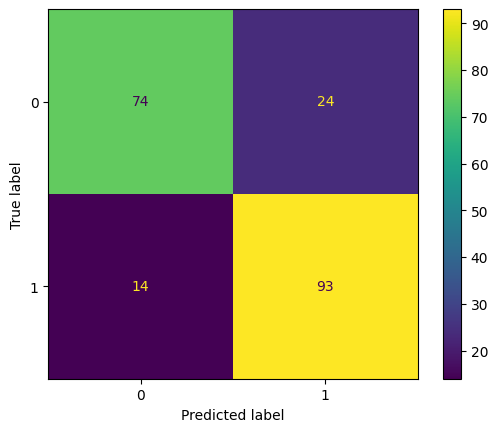

In [14]:
#plot Confusion matrix got deprecated in the version 1.o..using SVC AND confusionDisplayMatrix
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
cm = confusion_matrix(y_test,nbpred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [15]:
#Classification Report
print(classification_report(y_test, nbpred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        98
           1       0.79      0.87      0.83       107

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



Result:
    Created a machine Learning Model using Gaussain Naive Bayes Algorithm and tested the accuracy of the algorithm
